<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/SDAIA-T5-week-one/blob/main/Another_copy_of_Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Task 2/Task (2) Dataset.csv')

In [4]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [5]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


In [6]:
df.shape

(66639, 9)

In [7]:
column_names = df.columns
print(column_names)

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive'],
      dtype='object')


In [8]:
df.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum().sum()

7734

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [12]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Date'] = df['Datetime'].dt.date

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 66639 non-null  object        
 1   Datetime             66639 non-null  datetime64[ns]
 2   TrafficIndexLive     66639 non-null  int64         
 3   JamsCount            66639 non-null  int64         
 4   JamsDelay            66639 non-null  float64       
 5   JamsLength           66639 non-null  float64       
 6   TrafficIndexWeekAgo  66639 non-null  int64         
 7   TravelTimeHistoric   62772 non-null  float64       
 8   TravelTimeLive       62772 non-null  float64       
 9   Date                 66639 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 5.1+ MB


In [14]:
df.isnull().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
Date                      0
dtype: int64

In [15]:
modes = df.mode().iloc[0]


df.fillna(modes, inplace=True)

In [16]:
df.isnull().sum()

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
Date                   0
dtype: int64

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [17]:
df.describe()


,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000
mean,2023-07-21 19:21:11.079652864,14.043113,74.278531,288.353877,49.316135,13.981737,69.469116,68.694910
min,2022-12-16 11:01:30,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,2023-05-04 19:01:15,3.000000,9.000000,27.700000,3.000000,3.000000,61.915433,59.278701
50%,2023-08-11 02:16:30,10.000000,29.000000,95.700000,12.200000,10.000000,68.145129,67.320669
75%,2023-10-13 05:01:30,21.000000,95.000000,336.600000,53.500000,21.000000,75.697609,76.389208
max,2023-12-15 08:46:30,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139
std,NaN,13.488906,107.452022,470.013224,85.352525,13.454922,11.422198,12.830919


### Identify and analyze patterns in the data.

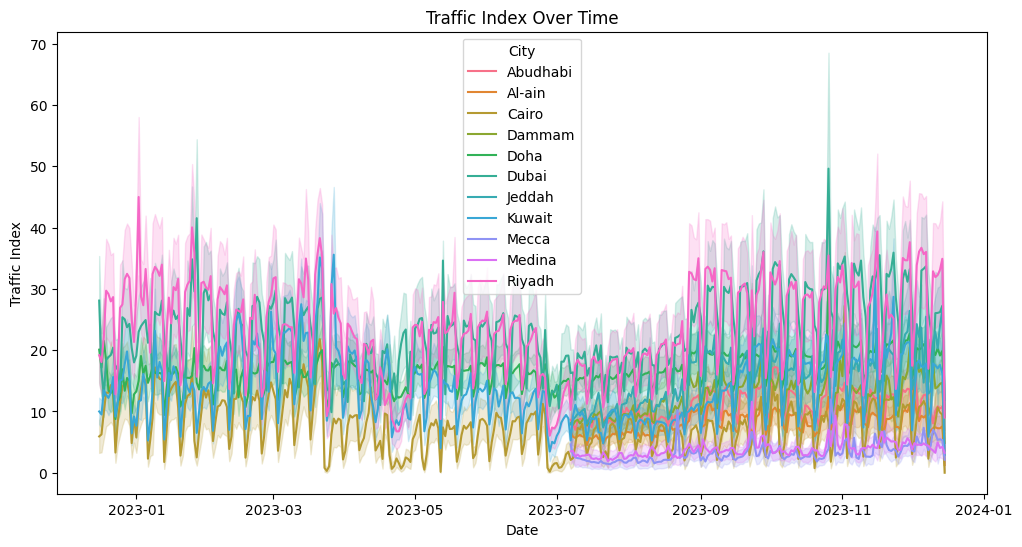

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TrafficIndexLive', data=df, hue='City')
plt.title('Traffic Index Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Index')
plt.show()

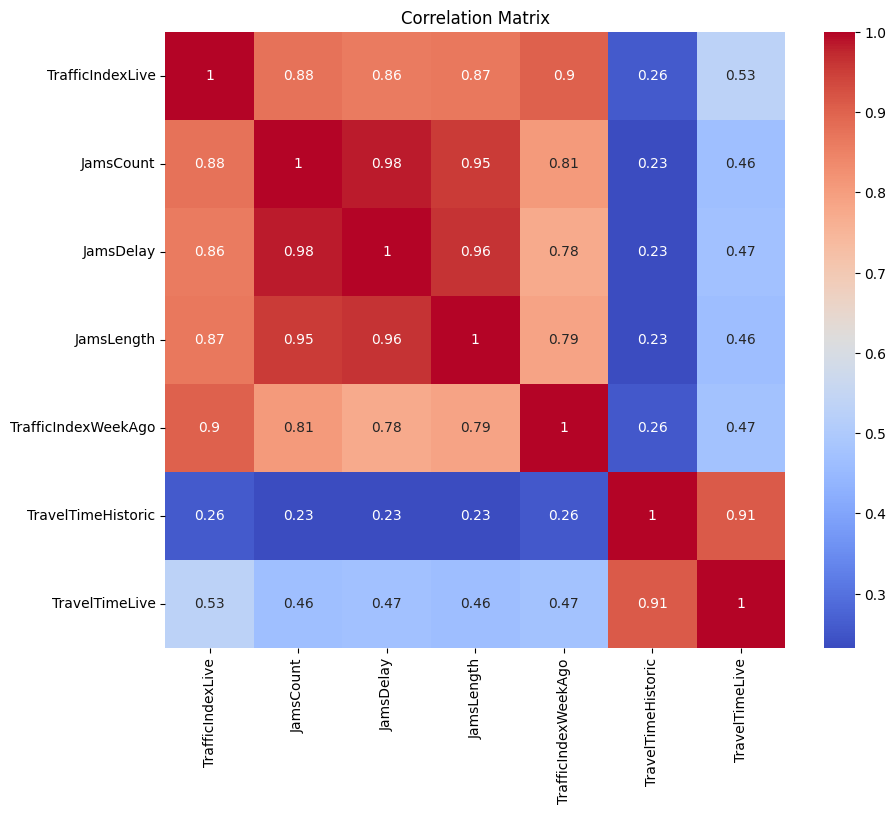

In [19]:
numerical_df = df.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

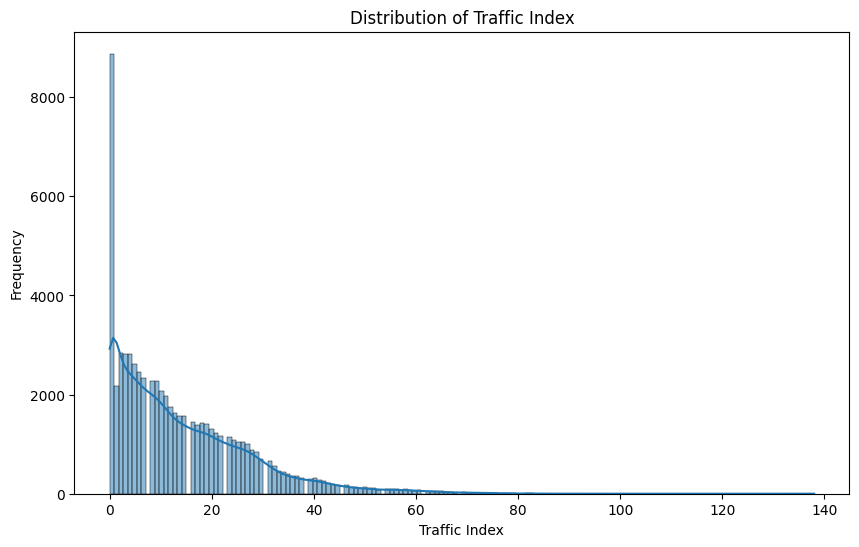

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index')
plt.xlabel('Traffic Index')
plt.ylabel('Frequency')
plt.show()

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [21]:
print(df.columns)

Index(['City', 'Datetime', 'TrafficIndexLive', 'JamsCount', 'JamsDelay',
       'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric',
       'TravelTimeLive', 'Date'],
      dtype='object')


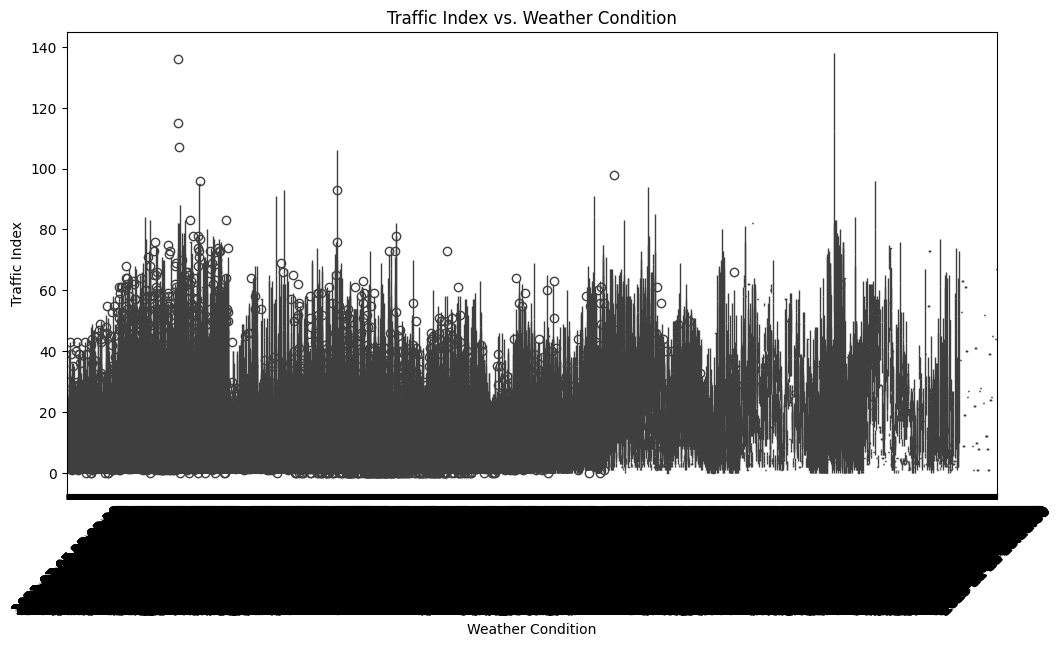

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Datetime', y='TrafficIndexLive', data=df)
plt.title('Traffic Index vs. Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Index')
plt.xticks(rotation=45)
plt.show()


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

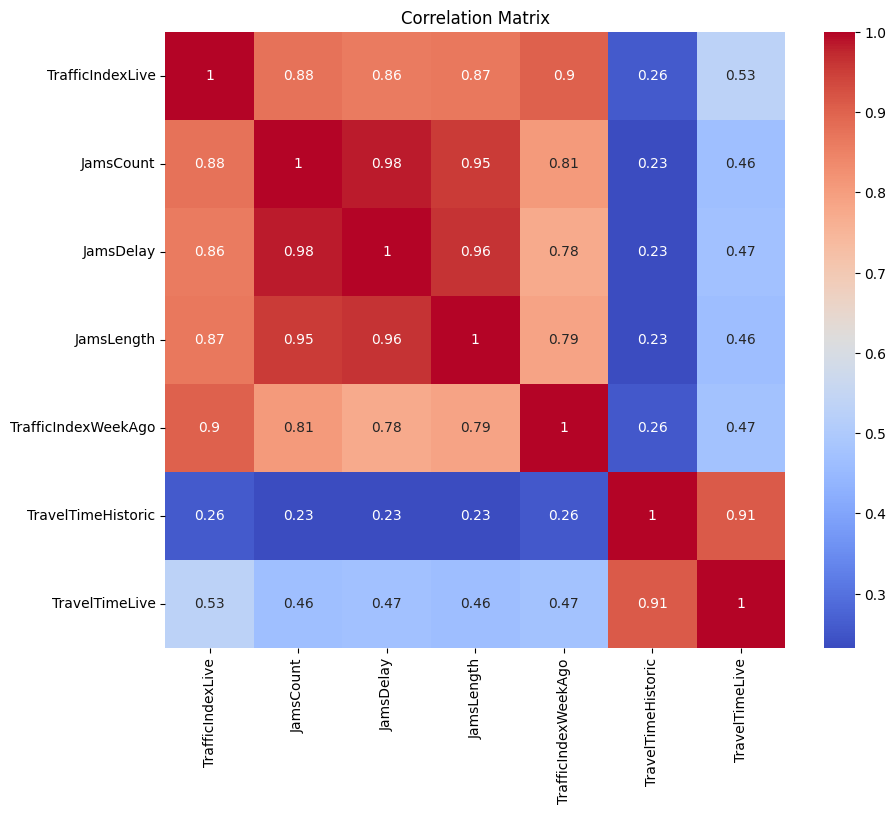

In [28]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

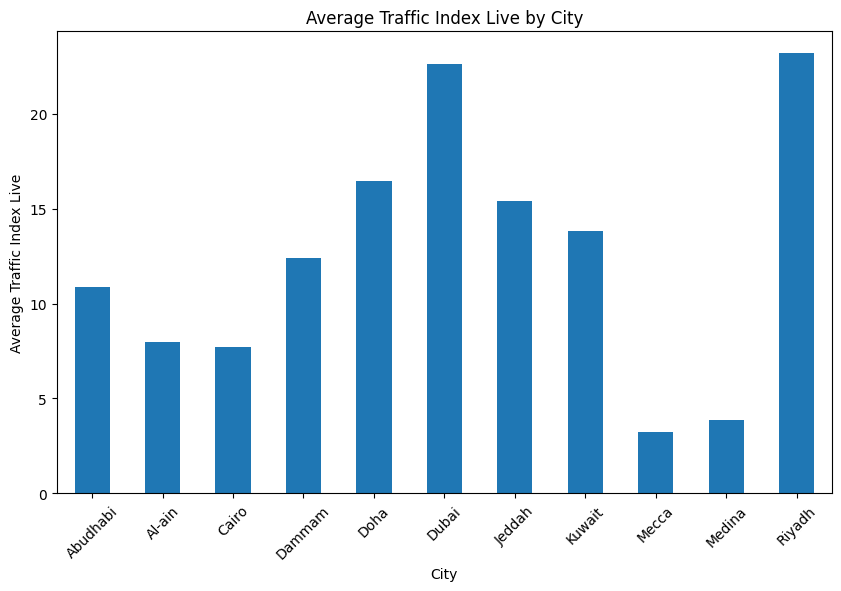

In [29]:
plt.figure(figsize=(10, 6))
df.groupby('City')['TrafficIndexLive'].mean().plot(kind='bar')
plt.title('Average Traffic Index Live by City')
plt.xlabel('City')
plt.ylabel('Average Traffic Index Live')
plt.xticks(rotation=45)
plt.show()


## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

dataset it is have
df.shape

(66639, 12)

The number of columns and features you can get is 12, and the number of rows is 66639,

The conclusion from the analysis of this data: 1- Dubai is considered one of the busiest cities. 2- The days of the week are the busiest, specifically Thursday. 3- After that, we used the collation matrix to display the relationship of the variables to each other. We used the heat map to make the matrix colorful and clearer.

The data set contains two columns that contain missing information TravelTimeHistoric 3867
TravelTimeLive 3867

At 18:00 GMT it is the busiest